# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
        # Parse the JSON and retrieve data
    city_weather_response = requests.get(city_url)
    city_weather = city_weather_response.json()
    if (city_weather_response.status_code == 200 ) :
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date =  city_weather["dt"]
        
        # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city
    else:
            print("City not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | calama
Processing Record 3 of Set 1 | zalingei
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | novyy urengoy
Processing Record 6 of Set 1 | la ronge
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | meulaboh
Processing Record 14 of Set 1 | le beausset
Processing Record 15 of Set 1 | shadegan
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 |

Processing Record 36 of Set 4 | puerto santa
Processing Record 37 of Set 4 | ivrindi
Processing Record 38 of Set 4 | cacheu
Processing Record 39 of Set 4 | krasnoturansk
Processing Record 40 of Set 4 | lihue
Processing Record 41 of Set 4 | emerald
Processing Record 42 of Set 4 | zeya
Processing Record 43 of Set 4 | san carlos de bariloche
Processing Record 44 of Set 4 | mahina
Processing Record 45 of Set 4 | turkmenbasy
Processing Record 46 of Set 4 | labytnangi
Processing Record 47 of Set 4 | kurmuk
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | queenstown
Processing Record 0 of Set 5 | port sudan
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | garhi khairo
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | quelimane
Processing Record 7 of Set 5 | bubaque
Processing Record 8 of Set 5 | chibougamau
Processing Record 9 o

Processing Record 27 of Set 8 | anshun
Processing Record 28 of Set 8 | ciudad bolivar
Processing Record 29 of Set 8 | san ignacio
Processing Record 30 of Set 8 | victorica
Processing Record 31 of Set 8 | plouguerneau
Processing Record 32 of Set 8 | idfu
Processing Record 33 of Set 8 | encruzilhada do sul
Processing Record 34 of Set 8 | haiku-pauwela
Processing Record 35 of Set 8 | devils lake
Processing Record 36 of Set 8 | ojinaga
Processing Record 37 of Set 8 | santa ines
Processing Record 38 of Set 8 | kapa'a
Processing Record 39 of Set 8 | oltinko'l
Processing Record 40 of Set 8 | khedbrahma
Processing Record 41 of Set 8 | lazaro cardenas
Processing Record 42 of Set 8 | mokhsogollokh
Processing Record 43 of Set 8 | burang
Processing Record 44 of Set 8 | tocopilla
Processing Record 45 of Set 8 | dennery
Processing Record 46 of Set 8 | nuuk
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | biltine
Processing Record 49 of Set 8 | road town
Processing Rec

Processing Record 16 of Set 12 | tommot
Processing Record 17 of Set 12 | northam
Processing Record 18 of Set 12 | levuka
Processing Record 19 of Set 12 | lowestoft
Processing Record 20 of Set 12 | mil'kovo
Processing Record 21 of Set 12 | necochea
Processing Record 22 of Set 12 | sol'-iletsk
Processing Record 23 of Set 12 | kill devil hills
Processing Record 24 of Set 12 | turabah
Processing Record 25 of Set 12 | tumayr
Processing Record 26 of Set 12 | roseto degli abruzzi
Processing Record 27 of Set 12 | launceston
Processing Record 28 of Set 12 | takab
Processing Record 29 of Set 12 | yanchep
Processing Record 30 of Set 12 | balaipungut
Processing Record 31 of Set 12 | le port
Processing Record 32 of Set 12 | fortuna
Processing Record 33 of Set 12 | coahuayana de hidalgo
Processing Record 34 of Set 12 | gur'yevsk
Processing Record 35 of Set 12 | fisterra
Processing Record 36 of Set 12 | rongelap
Processing Record 37 of Set 12 | maqat
Processing Record 38 of Set 12 | severobaykal'sk
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
#print(city_data)

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,298.30,61,55,6.86,RU,1690167144
1,calama,-22.4667,-68.9333,285.57,19,22,3.28,CL,1690166894
2,zalingei,12.9096,23.4741,296.99,65,9,0.66,SD,1690167144
3,gadzhiyevo,69.2551,33.3362,282.46,95,100,6.20,RU,1690167145
4,novyy urengoy,66.0833,76.6333,296.66,53,19,1.37,RU,1690166878


In [7]:
#Convert Temperature from lelvin to degree celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690167144
1,calama,-22.4667,-68.9333,12.42,19,22,3.28,CL,1690166894
2,zalingei,12.9096,23.4741,23.84,65,9,0.66,SD,1690167144
3,gadzhiyevo,69.2551,33.3362,9.31,95,100,6.20,RU,1690167145
4,novyy urengoy,66.0833,76.6333,23.51,53,19,1.37,RU,1690166878


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690167144
1,calama,-22.4667,-68.9333,12.42,19,22,3.28,CL,1690166894
2,zalingei,12.9096,23.4741,23.84,65,9,0.66,SD,1690167144
3,gadzhiyevo,69.2551,33.3362,9.31,95,100,6.20,RU,1690167145
4,novyy urengoy,66.0833,76.6333,23.51,53,19,1.37,RU,1690166878


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

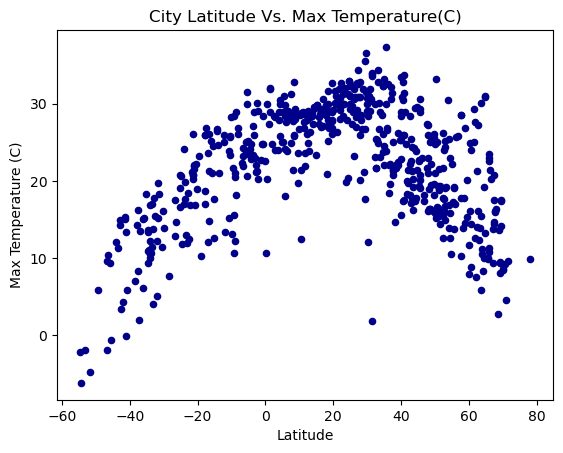

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',y='Max Temp',c='DarkBlue' ,title='City Latitude Vs. Max Temperature(C)')
# Incorporate the other graph properties
# YOUR CODE HERE
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

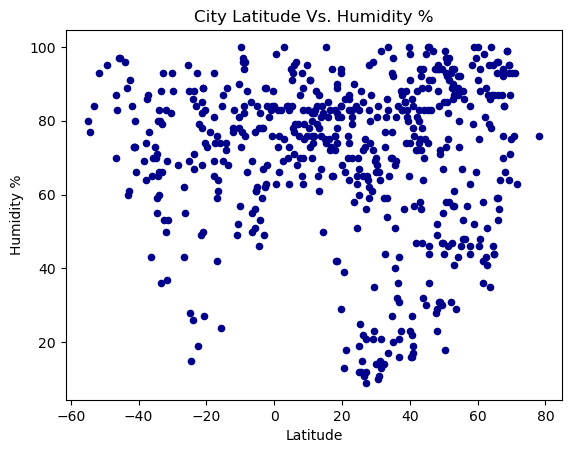

In [14]:
# Build the scatter plots for latitude vs. humidity

ax1 = city_data_df.plot.scatter(x='Lat',y='Humidity',c='DarkBlue' ,title='City Latitude Vs. Humidity %')
# Incorporate the other graph properties

ax1.set_xlabel("Latitude")
ax1.set_ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

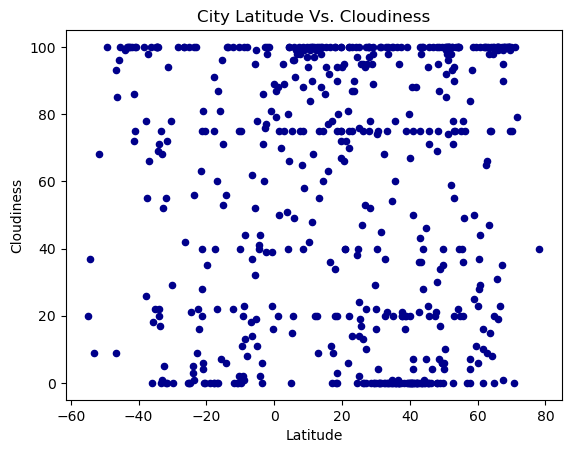

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',y='Cloudiness',c='DarkBlue' ,title='City Latitude Vs. Cloudiness')
# Incorporate the other graph properties
# YOUR CODE HERE
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

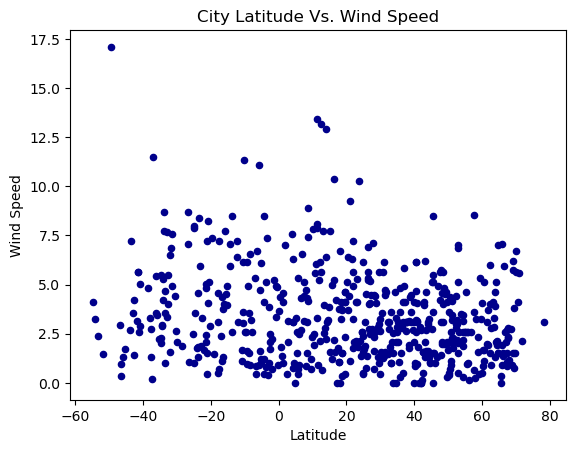

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',y='Wind Speed',c='DarkBlue' ,title='City Latitude Vs. Wind Speed')
# Incorporate the other graph properties
# YOUR CODE HERE
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots

import seaborn as sns
import altair as alt
import scipy

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690167144
2,zalingei,12.9096,23.4741,23.84,65,9,0.66,SD,1690167144
3,gadzhiyevo,69.2551,33.3362,9.31,95,100,6.20,RU,1690167145
4,novyy urengoy,66.0833,76.6333,23.51,53,19,1.37,RU,1690166878
5,la ronge,55.1001,-105.2842,22.12,46,75,2.57,CA,1690167145


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,calama,-22.4667,-68.9333,12.42,19,22,3.28,CL,1690166894
6,port-aux-francais,-49.3500,70.2167,5.82,95,100,17.09,TF,1690167145
7,adamstown,-25.0660,-130.1015,20.76,69,100,7.86,PN,1690167146
10,papatowai,-46.5619,169.4708,9.63,87,93,0.97,NZ,1690167147
11,margaret river,-33.9500,115.0667,16.87,60,22,8.67,AU,1690167148


###  Temperature vs. Latitude Linear Regression Plot

R Value is : -0.9999999999999998
None


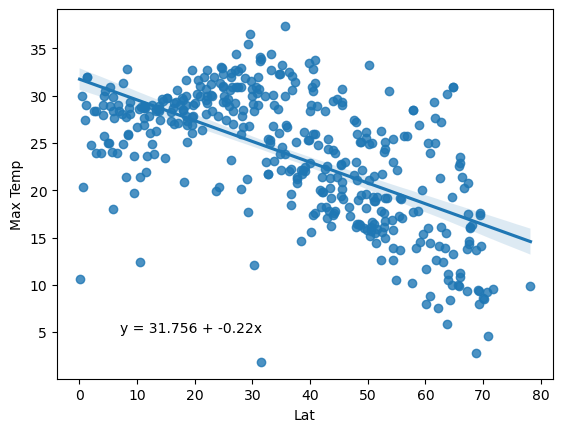

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#create regplot
p = sns.regplot(data=northern_hemi_df, x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(7, 5,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))


R Value is : 0.9999999999999991
None


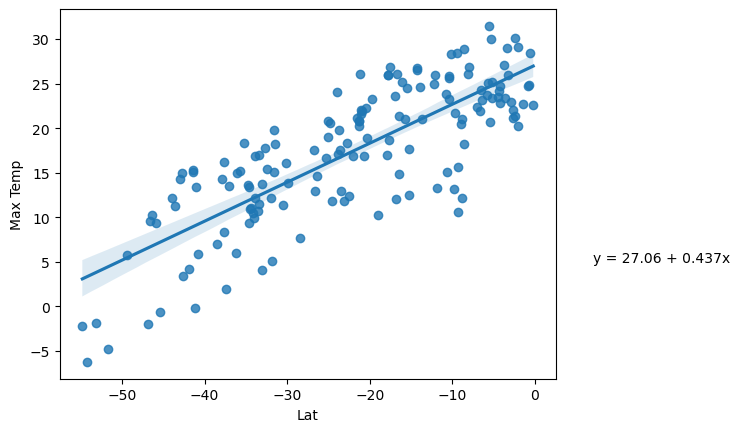

In [30]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

p = sns.regplot(data=southern_hemi_df, x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(7, 5,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

**Discussion about the linear relationship:** In Northern hamisphere Temperature decreases when latitude increase where as it is vice versa in southern Hamisphere. 

### Humidity vs. Latitude Linear Regression Plot

R Value is : -1.0
None


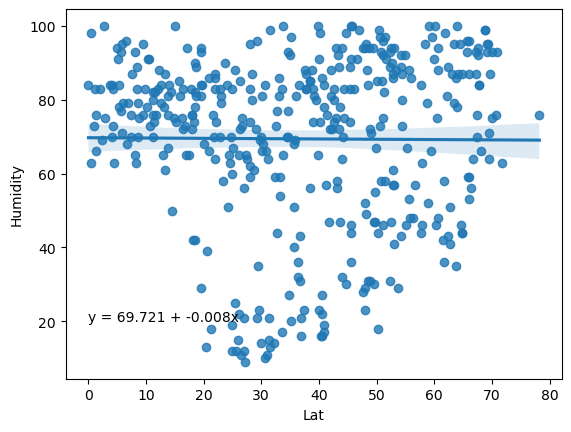

In [40]:
# Northern Hemisphere
p = sns.regplot(data=northern_hemi_df, x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(0,20,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

R Value is : -0.9999999999999997
None


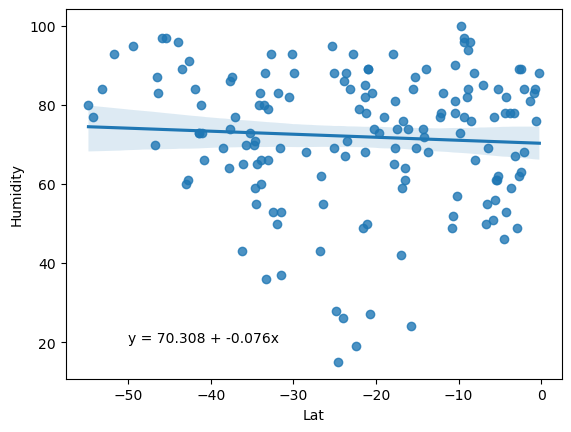

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
p = sns.regplot(data=southern_hemi_df, x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(-50, 20,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

**Discussion about the linear relationship:Northern hamisphere is more humid than southern hamisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

R Value is : -1.0
None


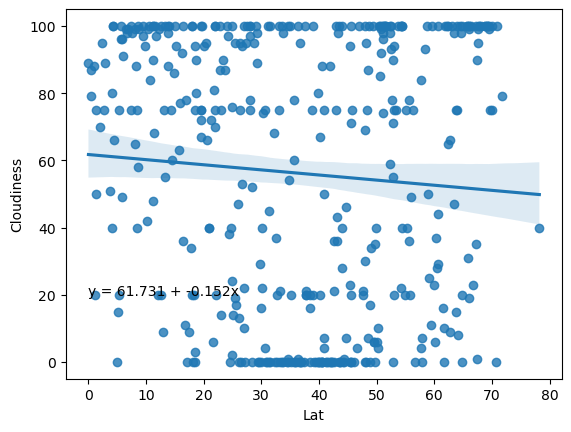

In [41]:
# Northern Hemisphere
p = sns.regplot(data=northern_hemi_df, x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(0,20,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

R Value is : -0.9999999999999996
None


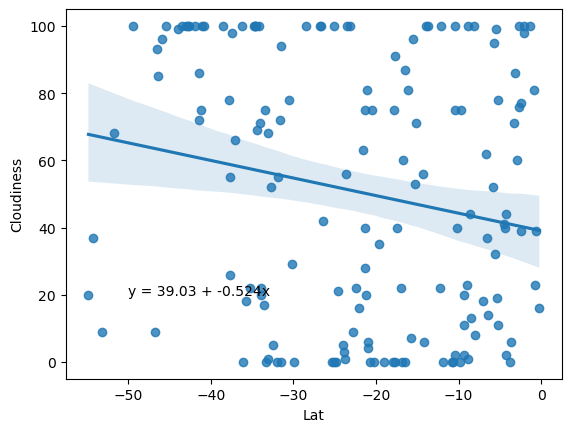

In [42]:
# Southern Hemisphere
p = sns.regplot(data=southern_hemi_df, x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(-50, 20,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

**Discussion about the linear relationship:** Equator area is less cloudy and Northern hamisphere is more cloudy

### Wind Speed vs. Latitude Linear Regression Plot

R Value is : -1.0
None


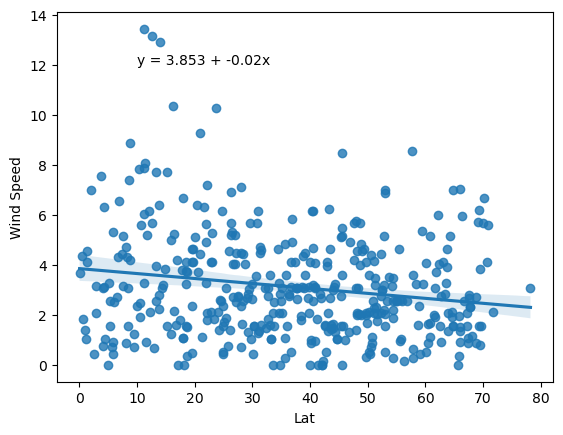

In [44]:
# Northern Hemisphere
p = sns.regplot(data=northern_hemi_df, x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(10,12,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

R Value is : -0.9999999999999996
None


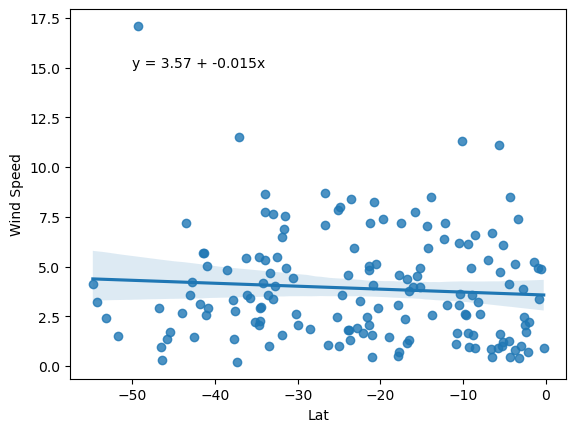

In [46]:
# Southern Hemisphere
p = sns.regplot(data=southern_hemi_df, x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"])
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
#add regression equation to plot
plt.text(-50, 15,'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
print(print (f"R Value is : {r}"))

**Discussion about the linear relationship:** Northern hamisphere is more windy than southern